In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
file = '/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/'
Runs = [file+"Run_TopNoEmb"+str(i)for i in range(11)]
print(Runs)
data = []
file_name = []
for i in range(len(Runs)):
    file = Runs[i]
    for files in os.listdir(file):
        if files.endswith('.npy'):
            file_name.append(files)
            path = os.path.join(file,files)
            data.append(np.load(path,allow_pickle=True))

['/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/Run_TopNoEmb0', '/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/Run_TopNoEmb1', '/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/Run_TopNoEmb2', '/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/Run_TopNoEmb3', '/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/Run_TopNoEmb4', '/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/Run_TopNoEmb5', '/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/Run_TopNoEmb6', '/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/Run_TopNoEmb7', '/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/Run_TopNoEmb8', '/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/Run_TopNoEmb9', '/admin/ProjetMLA/Code_Ugo/Resultats/TopNoEmb/Run_TopNoEmb10']


In [3]:
print(file_name)
    


['sst2_data.npy', 'sst2_data.npy', 'sst2_data.npy', 'sst2_data.npy', 'sst2_data.npy', 'sst2_data.npy', 'sst2_data.npy', 'sst2_data.npy', 'sst2_data.npy', 'sst2_data.npy', 'sst2_data.npy']


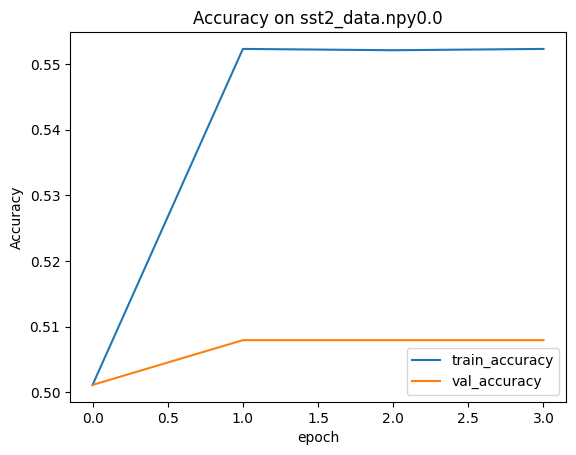

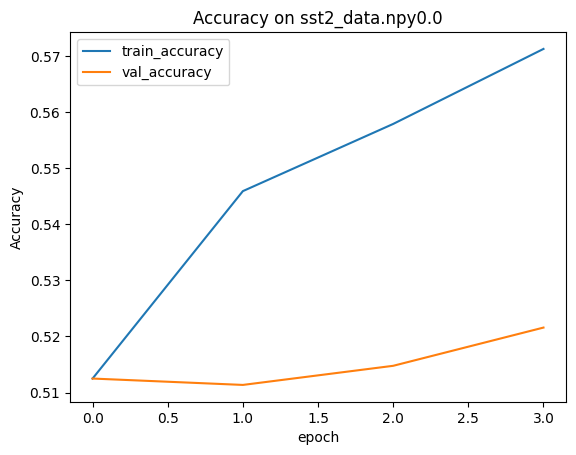

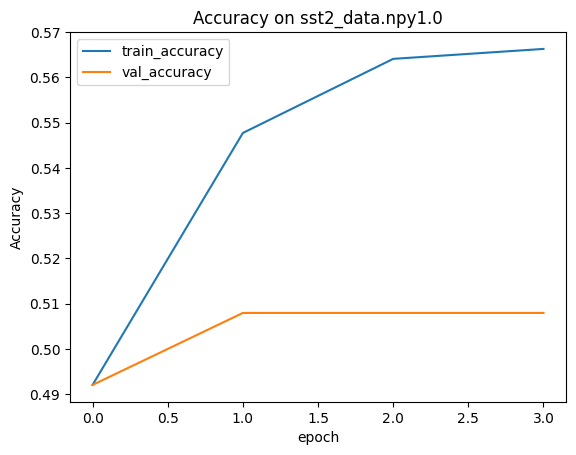

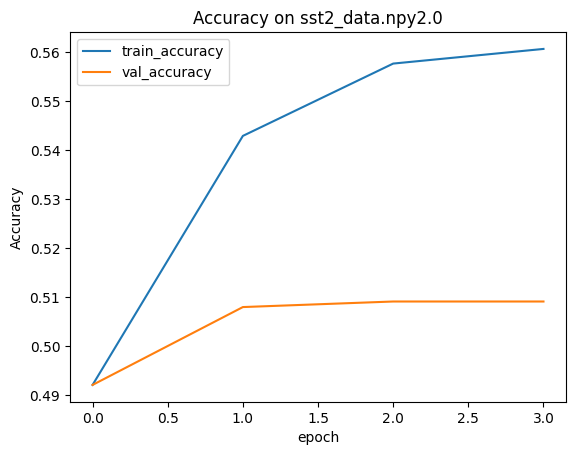

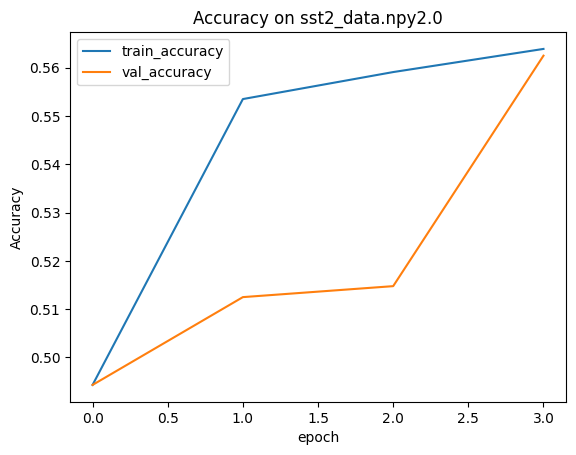

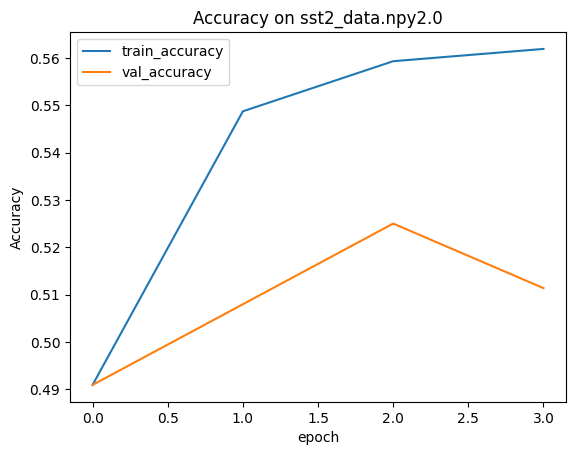

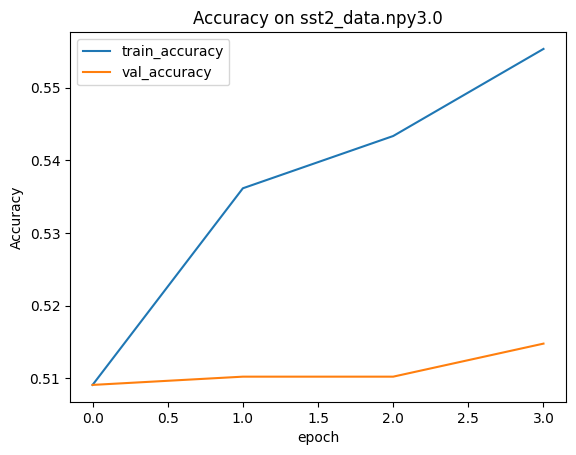

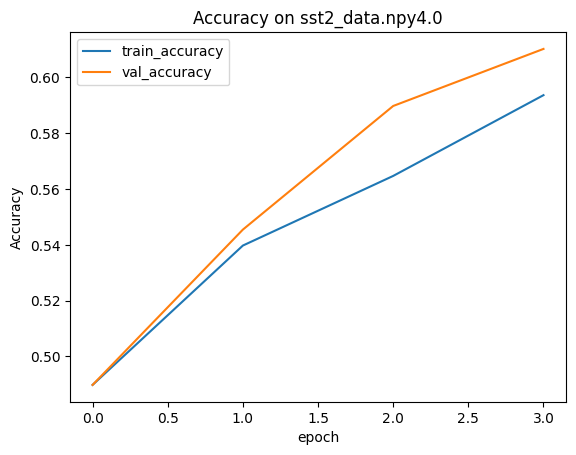

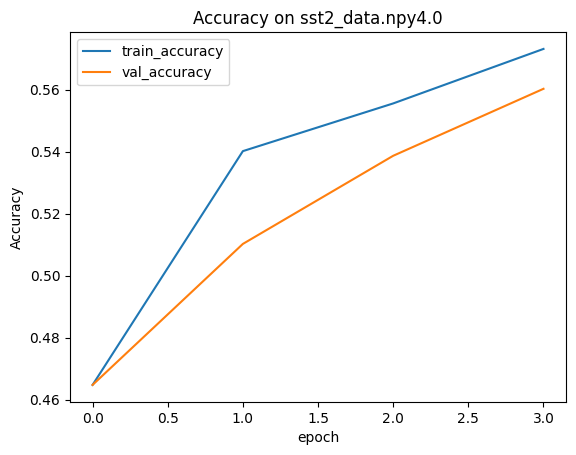

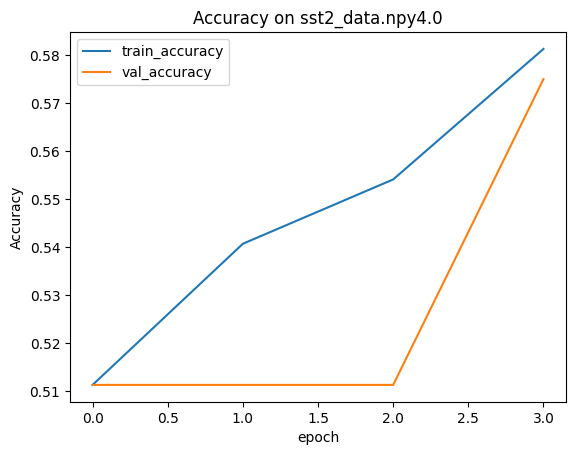

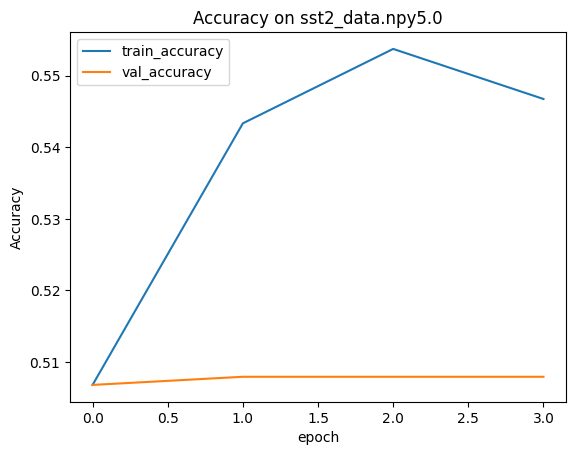

In [4]:

for i in range(len(data)):
    plt.plot(data[i][0],label="train_accuracy")
    plt.plot(data[i][1],label="val_accuracy")
    plt.title("Accuracy on "+file_name[i]+str(np.round(i/2)))
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("Accuracy")
    plt.show()

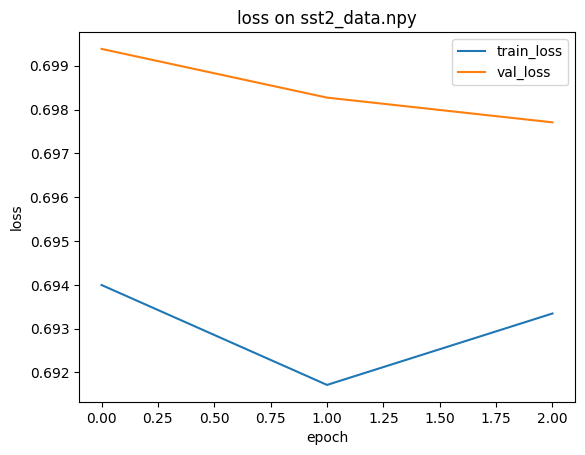

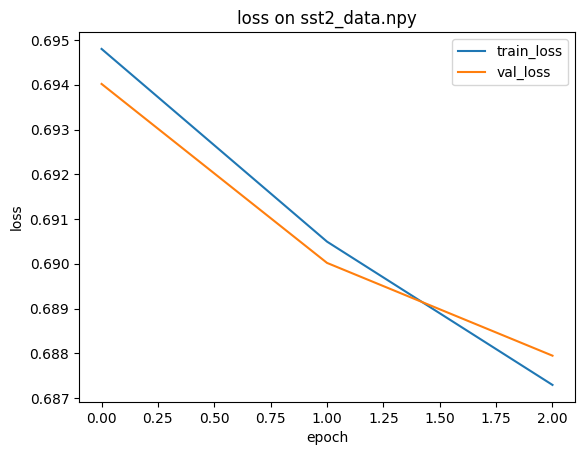

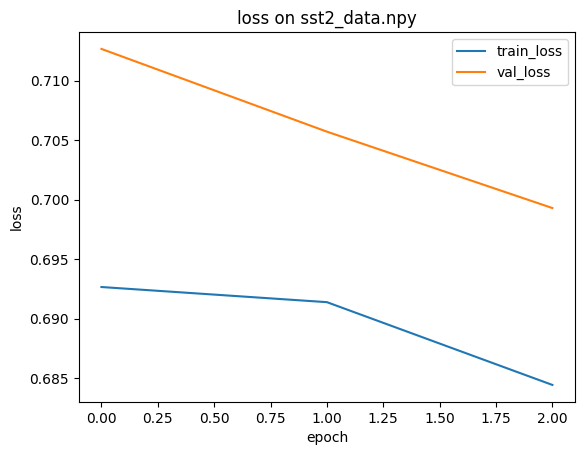

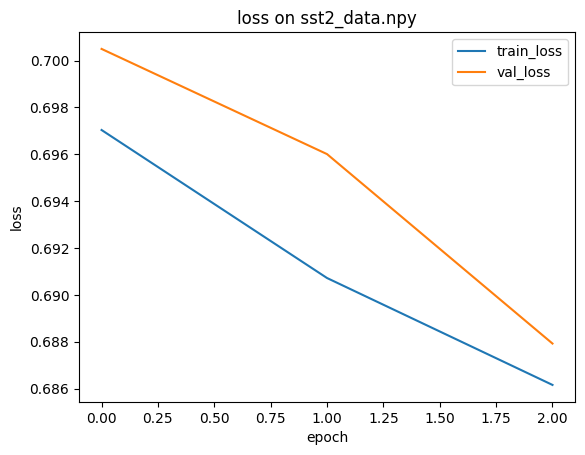

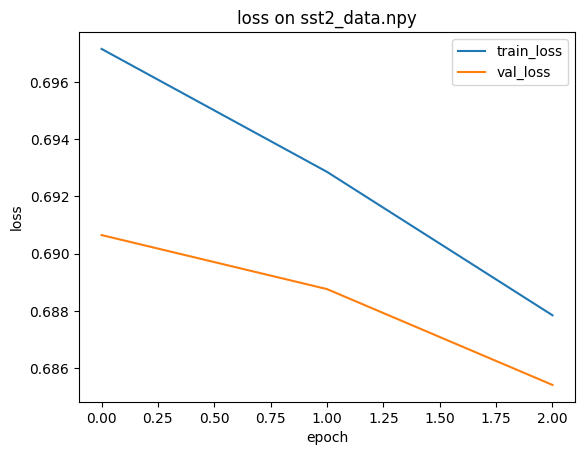

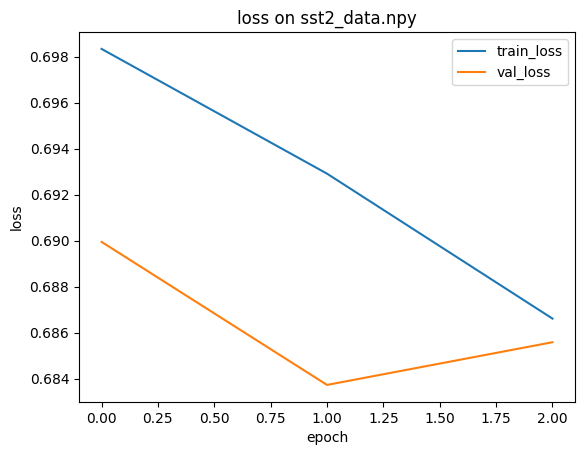

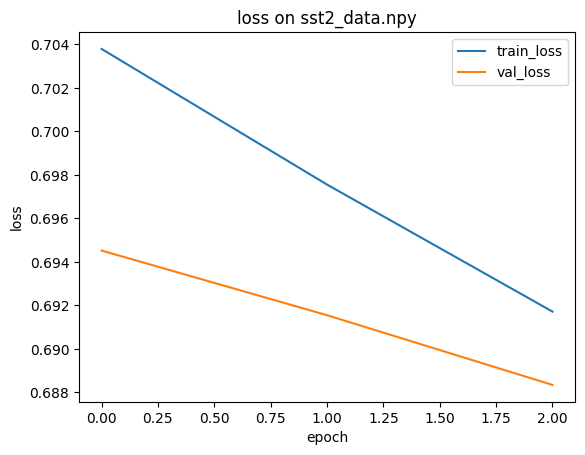

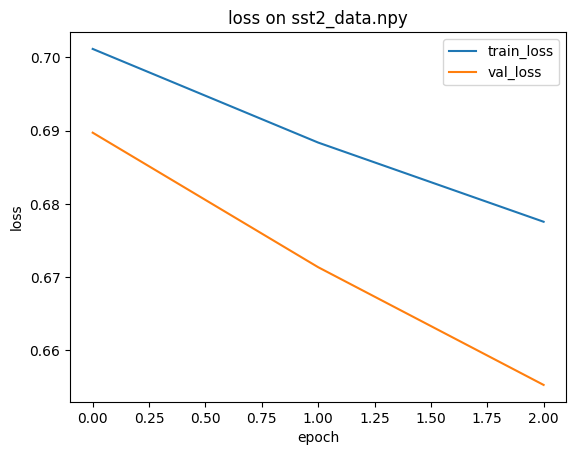

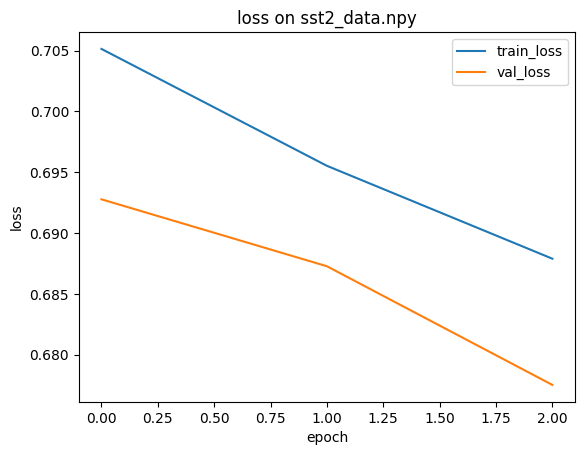

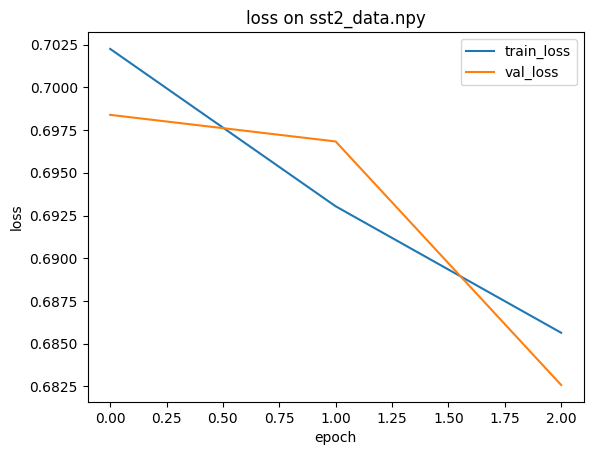

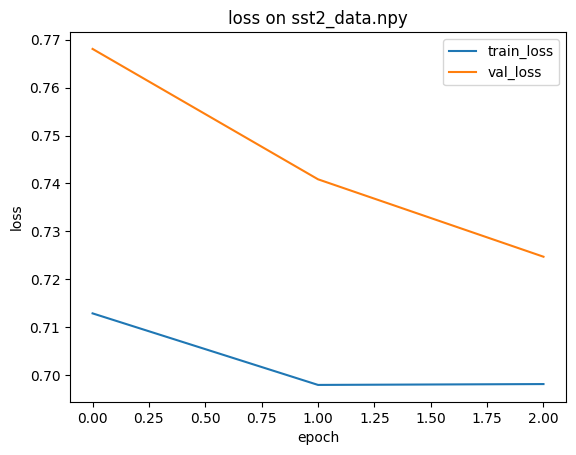

In [5]:
for i in range(len(data)):
    plt.plot(data[i][3],label="train_loss")
    plt.plot(data[i][4],label="val_loss")
    plt.title("loss on "+file_name[i])
    plt.legend()
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.show()

Les meilleurs performances de stabilité, de convergence, et d'overfitting du fine-tuning sur le dataset sst sont atteintes pour un lr=3e-5, et 3 epoch

In [6]:
for i in range(len(data)):
    print('Accuracy at the end of fine tuning on {}: {}'.format(file_name[i],data[i][2][1]))

Accuracy at the end of fine tuning on sst2_data.npy: 0.5079545454545454
Accuracy at the end of fine tuning on sst2_data.npy: 0.5215909090909091
Accuracy at the end of fine tuning on sst2_data.npy: 0.5079545454545454
Accuracy at the end of fine tuning on sst2_data.npy: 0.509090909090909
Accuracy at the end of fine tuning on sst2_data.npy: 0.5625
Accuracy at the end of fine tuning on sst2_data.npy: 0.5113636363636364
Accuracy at the end of fine tuning on sst2_data.npy: 0.5147727272727273
Accuracy at the end of fine tuning on sst2_data.npy: 0.6102272727272727
Accuracy at the end of fine tuning on sst2_data.npy: 0.5602272727272727
Accuracy at the end of fine tuning on sst2_data.npy: 0.575
Accuracy at the end of fine tuning on sst2_data.npy: 0.5079545454545454


Performance de Bert sur le benchmark


CoLA	eval_accuracy	0.6868686315
SST	eval_accuracy	0.50681818
MRPC	eval_f1	0.80319616
QQP	eval_accuracy	0.646484375484375484375890405

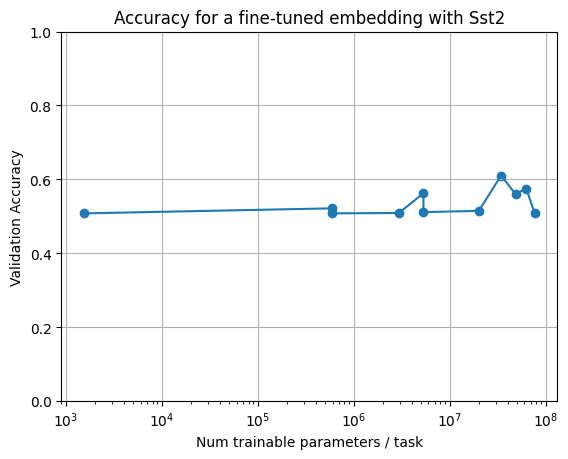

In [8]:
AcSst2 = []

for i in range(len(data)):
    AcSst2.append(data[i][2][1])

size = [1538,592130,593666,2953730,5316098,
5317634,20083970,34259714,48435458,62611202,
76786946]



plt.semilogx(size,AcSst2)
plt.scatter(size,AcSst2)
plt.ylim([0,1])
plt.xscale("log")
plt.grid()
plt.xlabel("Num trainable parameters / task")
plt.ylabel("Validation Accuracy")
plt.title("Accuracy for a fine-tuned embedding with Sst2")
plt.show()


